# Project 1: Write A Blog (Code)
### Project Motivation
This notebook is for project "Write A Blog Post" for the Udacity nano degree in data science. The following steps for the CRISP-DM process are covered within this notebook: Business Understanding, Prepare Data, Data Understanding, Data Cleansing, Data Analysis, Evaluate the Results, Business Summary.

### Business Understanding
Three questions to be answered:
#### Q1: is the salary for developers from the Germany higher than those from United States?
#### Q2: is the career satisfaction for developers from the Germany higher than those from United States?
#### Q3: is the job satisfaction for developers from the Germany higher than those from United States?

### Prepare the Data

Load the data

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
%matplotlib inline

df_re = pd.read_csv('./survey_results_public.csv')
df_re.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df_sh = pd.read_csv('./survey_results_schema.csv')
df_sh.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


### Data Understanding

How does the survey quetions look like?

In [115]:
# how many questions in the survey?

df_sh

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [116]:
# build a function to count the size of the dataset
def DataSize(num_rows, num_cols): 
    """
    This section is to help count the size of the dataset"
    
    """
    print('Number of Rows: ', num_rows)
    print('Number of Columes: ', num_cols)

In [117]:
# data size of the survey results

DataSize(df_re.shape[0],df_re.shape[1]) 

Number of Rows:  19102
Number of Columes:  154


What are the countries the developers live in? And the # of developers?

In [118]:
# how many countries? how does the country profile look like? 
country_vals = df_re.Country.value_counts()
print(country_vals)

United States                     4364
India                             1557
United Kingdom                    1424
Germany                           1337
Canada                             874
Poland                             694
France                             522
Australia                          399
Netherlands                        373
Israel                             338
Russian Federation                 330
Spain                              312
Italy                              304
Sweden                             267
Brazil                             259
Romania                            251
Switzerland                        242
Slovenia                           190
Austria                            190
Iran                               174
Czech Republic                     167
Pakistan                           160
Ukraine                            148
Turkey                             146
Belgium                            138
Ireland                  

### Data Visualization

What are the professional status of the developers?

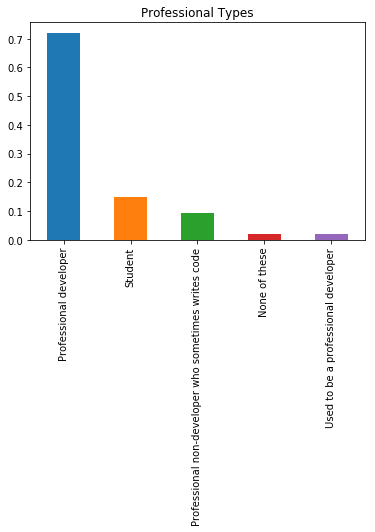

In [119]:
# What typs of professional are they? And the distribution?

professional_vals = df_re.Professional.value_counts()
(professional_vals/df_re.shape[0]).plot(kind="bar");
plt.title("Professional Types");

What are the top 10 countries with the most developers?

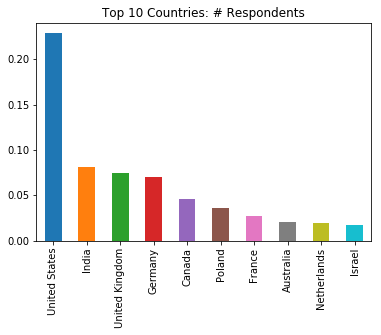

In [120]:
# Create the bar chart of the top 10 countries 

(country_vals[:10]/df_re.shape[0]).plot(kind="bar");
plt.title("Top 10 Countries: # Respondents");

### Data Analysis

#### Question 1: is the salary for developers from the Germany higher than those from United States?

In [139]:
# find max and min for salary. 
# Drop the values that are not available.
df_re.groupby(['Respondent']).mean()['Salary'].sort_values(ascending=False).dropna()

Respondent
18238    195000.000000
6744     195000.000000
1697     195000.000000
6718     193750.000000
14364    192000.000000
2371     192000.000000
6595     190000.000000
17573    190000.000000
1353     190000.000000
14783    188000.000000
14799    187500.000000
9937     187200.000000
12757    185000.000000
221      185000.000000
15964    185000.000000
2139     185000.000000
6025     180000.000000
6363     180000.000000
6501     180000.000000
1813     180000.000000
11167    180000.000000
10219    180000.000000
14222    180000.000000
6900     180000.000000
17319    180000.000000
2605     180000.000000
771      178000.000000
11728    175000.000000
7400     175000.000000
15031    175000.000000
             ...      
15441       205.549846
1078        200.000000
15180       176.185582
3570        161.503450
8459        150.375940
10414       138.914614
3992        138.000000
18701       123.479657
11848       106.060606
5439         96.000000
6783         92.000000
800          79.545455


In [158]:
# calculate the average salary for Germany
salary_gm_mean=df_re.Salary[df_re['Country']=='Germany'].mean()
print(salary_gm_mean)

51684.5596231


In [159]:
# calculate the median salary for Germany
salary_gm_median=df_re.Salary[df_re['Country']=='Germany'].median()
print(salary_gm_median)

52634.4086022


In [160]:
# calculate the average salary for countries except Germany
salary_nongm_mean=df_re.Salary[df_re['Country']=='United States'].mean()
print(salary_nongm_mean)

98722.1384929


In [161]:
# calculate the median salary for countries except Germany
salary_nongm_median=df_re.Salary[df_re['Country']=='United States'].median()
print(salary_nongm_median)

95900.0


#### Answers to Question 1

In [162]:
print('mean salary for Germany: ', salary_gm_mean)
print('median salary for Germany: ', salary_gm_median)
print('mean salary for United States: ', salary_nongm_mean)
print('median salary for United States: ', salary_nongm_median)

mean salary for Germany:  51684.5596231
median salary for Germany:  52634.4086022
mean salary for United States:  98722.1384929
median salary for United States:  95900.0


From the results above, we can see the mean and average of the salarie for developers in Germany is significant lower than those in US. 

#### Question 2: is the career satisfaction for developers from Germany higher than those from United States?

In [175]:
# averaqge career satisfaction of Germany developers

CareerSatisfaction_gm_Mean=df_re.CareerSatisfaction[df_re['Country']=='Germany'].mean()
print(CareerSatisfaction_gm_Mean)

7.19593345656


In [176]:
# averaqge career satisfaction of developers from United States

CareerSatisfaction_nongm_Mean=df_re.CareerSatisfaction[df_re['Country']=='United States'].mean()
print(CareerSatisfaction_nongm_Mean)

7.6180537438


In [177]:
# median career satisfaction of developers from Germany

CareerSatisfaction_gm_Median=df_re.CareerSatisfaction[df_re['Country']=='Germany'].median()
print(CareerSatisfaction_gm_Median)

8.0


In [178]:
# median career satisfaction of developers from other countries

CareerSatisfaction_nongm_Median=df_re.CareerSatisfaction[df_re['Country']=='United States'].median()
print(CareerSatisfaction_nongm_Median)

8.0


In [174]:
# max and min for career satisfaction. 
# Drop the values that are not available.
df_re.groupby(['Respondent']).mean()['CareerSatisfaction'].sort_values(ascending=False).dropna()

Respondent
5704     10.0
10019    10.0
17009    10.0
2623     10.0
5428     10.0
17002    10.0
15005    10.0
15006    10.0
2637     10.0
2641     10.0
15009    10.0
12637    10.0
11837    10.0
15011    10.0
16988    10.0
16987    10.0
2654     10.0
13544    10.0
15001    10.0
17012    10.0
17028    10.0
2584     10.0
10037    10.0
5444     10.0
5443     10.0
10031    10.0
11829    10.0
8754     10.0
2619     10.0
13874    10.0
         ... 
2857      0.0
14609     0.0
11931     0.0
8576      0.0
2308      0.0
4275      0.0
107       0.0
12817     0.0
5892      0.0
4530      0.0
8358      0.0
12888     0.0
10330     0.0
9748      0.0
767       0.0
12877     0.0
1028      0.0
2201      0.0
16284     0.0
755       0.0
13710     0.0
9324      0.0
12852     0.0
7082      0.0
10497     0.0
18980     0.0
11288     0.0
15634     0.0
473       0.0
14174     0.0
Name: CareerSatisfaction, Length: 16102, dtype: float64

#### Answers to Question 2

In [179]:
print('Mean Career Satisfaction for Germany developers:', CareerSatisfaction_gm_Mean)
print('Median Career Satisfaction for Germany developers:', CareerSatisfaction_gm_Median)
print('Mean Career Satisfaction for develpers from United States:', CareerSatisfaction_nongm_Mean)
print('Median Career Satisfaction for developers from Unnited States:', CareerSatisfaction_nongm_Median)

Mean Career Satisfaction for Germany developers: 7.19593345656
Median Career Satisfaction for Germany developers: 8.0
Mean Career Satisfaction for develpers from United States: 7.6180537438
Median Career Satisfaction for developers from Unnited States: 8.0


It looks average career satisfaction for Germany developers is slightly lower than those in US. From median point view, Germany developers is actually matched to US developers.

#### Question 3: is the job satisfaction for developers from the Germany higher than those from United States?

In [181]:
# average job satisfaction for Germany developers

JobSatisfaction_gm_Mean=df_re.JobSatisfaction[df_re['Country']=='Germany'].mean()
print(JobSatisfaction_gm_Mean)

7.05495583906


In [182]:
# average job satisfaction for other developers

JobSatisfaction_nongm_Mean=df_re.JobSatisfaction[df_re['Country']=='United States'].mean()
print(JobSatisfaction_nongm_Mean)

7.14182825485


In [183]:
# median job satisfaction for Germany developers

JobSatisfaction_gm_Median=df_re.JobSatisfaction[df_re['Country']=='Germany'].median()
print(JobSatisfaction_gm_Median)

7.0


In [184]:
# median job satisfaction for other developers

JobSatisfaction_nongm_Median=df_re.JobSatisfaction[df_re['Country']=='United States'].median()
print(JobSatisfaction_nongm_Median)

8.0


In [185]:
# max and min for job satisfaction. 
# Drop the values that are not available. 
df_re.groupby(['Respondent']).mean()['JobSatisfaction'].sort_values(ascending=False).dropna()

Respondent
2641     10.0
14032    10.0
3119     10.0
3118     10.0
7789     10.0
14029    10.0
3103     10.0
17052    10.0
3101     10.0
7837     10.0
7843     10.0
3081     10.0
17067    10.0
17069    10.0
3076     10.0
13992    10.0
17084    10.0
13990    10.0
13987    10.0
17090    10.0
3042     10.0
13985    10.0
13982    10.0
17100    10.0
17103    10.0
3031     10.0
13968    10.0
3021     10.0
7918     10.0
3123     10.0
         ... 
16720     0.0
17101     0.0
4776      0.0
107       0.0
5269      0.0
16357     0.0
3561      0.0
11851     0.0
4756      0.0
841       0.0
14174     0.0
14478     0.0
1897      0.0
6864      0.0
11931     0.0
2308      0.0
7610      0.0
1296      0.0
17822     0.0
19025     0.0
8600      0.0
9403      0.0
13110     0.0
12760     0.0
11792     0.0
11937     0.0
9416      0.0
7562      0.0
4113      0.0
11879     0.0
Name: JobSatisfaction, Length: 15253, dtype: float64

#### Results to Question 3

In [186]:
print('Mean Job Satisfaction for developers from Germany:', JobSatisfaction_gm_Mean)
print('Median Job Satisfaction for developers from Germany:', JobSatisfaction_gm_Median)
print('Mean Job Satisfaction for developers from United States:', JobSatisfaction_nongm_Mean)
print('Median Job Satisfaction for developers from United States:', JobSatisfaction_nongm_Median)

Mean Job Satisfaction for developers from Germany: 7.05495583906
Median Job Satisfaction for developers from Germany: 7.0
Mean Job Satisfaction for developers from United States: 7.14182825485
Median Job Satisfaction for developers from United States: 8.0


### Result Summary:

The analysis above shows that the software developers from the Germany do not have consistently advantages over rest of world in terms of salary, career satisfaction and job satisfaction.

In details:

Result to Question 1: From the results above, we can see the mean and average of the salarie for developers in Germany is significant lower than those in US. 

Result to Question 2: It looks average career satisfaction for Germany developers is slightly lower than those in US. From median point view, Germany developers is actually matched to US developers.

Result to Question 3:  Mean job satisfaction for developers from Germany is slightly lower than those in United States. On the other hand, the median value is actually significantly lower.